<a href="https://colab.research.google.com/github/vijaysheru/Credit-Card-Fraud-Detection-using-NLP/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection using Neural Networks

## 1. Data Import and Library Setup

Firstly we import all necessary libraries for the project such as pandas,pytorch,matplotlib,seaborn as the requirements for the project.The pandas library is for data manipulation, torch.nn and torch.nn.functional for building and training neural networks, and matplotlib.pyplot and seaborn for data visualization.

In [ ]:
#Importing Necessary Libraries required for the project
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

This is the step of Data Loading.Here we define a dataframe (df) and use read.csv function to read the credit card csv file.

In [ ]:
#Read the CSV File
df= pd.read_csv('creditcard.csv')

In the next couple of lines of code we display the data using head function where it shows the first 5 columns in the dataset and tail function shows the last 5 entries in the dataset.

In [ ]:
#To Display the First 5 Entries of Dataset
df.head()

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
0,2022-09-24 13:54:27,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,04/29,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,None,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...
1,2020-07-24 11:20:13,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,03/26,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,None,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,2023-03-18 01:05:36,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,11/29,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...
3,2021-01-07 21:53:04,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,09/25,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,NaN,Cupiditate repellendus necessitatibus quo occa...
4,2021-12-16 06:22:24,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,03/31,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...


In [ ]:
#To Display the Last 5 Entries of Dataset
df.tail()

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
7995,2020-12-17 20:36:48,2214.15,Lakshay Khatri,8a0015c8601fe597e160c31a05fd5e4a87a4b876df426f...,Manda Ltd,1236,Anantapuram,EUR,Visa,04/26,d4b9aead1dd10a596542d1d8211a5021b9c3e894751d01...,5,0d219c55-87cf-43af-a1bb-cda408710de1,0,1,Online,214.34.176.247,Mobile,madhavshah,Et maiores quaerat fugiat voluptatibus reprehe...
7996,2022-07-04 05:19:11,675.97,Dharmajan Salvi,de3530e65ccf6fc0c0eb7f7a7e8e5b71bb907d5207d390...,Bhavsar Group,3406,Guntakal,INR,Visa,11/25,d874e4e4a5df21173b0f83e313151f813bea4f488686ef...,0,054f6d58-9925-4c49-9f5d-01b6bf3db5c8,1,3 or more,In-Person,34.237.199.33,Tablet,NaN,Assumenda maxime provident rem quis consequunt...
7997,2022-08-14 19:14:45,918.28,Alia Sane,227356d19fd5374e9cfdd134387fe3499683a1c7929981...,"Gole, Yohannan and Singhal",7504,Udupi,USD,MasterCard,05/24,20e9c64c05a54d199610fb7e38135361324b5ed5dcf39c...,5,4178f63e-459b-40e6-8db6-a6ff2d6348e5,1,3 or more,In-Person,220.203.140.160,Tablet,suhanavala,Voluptatibus odit praesentium iste libero ipsa...
7998,2021-05-16 18:21:52,3035.31,Chirag Rege,669bd9fcc7e40cc25d99c773678e48bcb3fdadf7fee6a9...,Kakar LLC,4015,Sultan Pur Majra,EUR,American Express,09/24,e7866fdc6672f827c76f6124ca3eeaff44aff8b7caf4ee...,0,2424f724-8bd2-4dd0-8b39-e824999a9764,1,1,In-Person,216.56.133.227,Tablet,sumeriyengar,Animi excepturi nam distinctio fuga. Vel eius ...
7999,2023-06-14 06:12:26,3354.36,Alia Bose,8db138a97db4df2c7533dfca014dcd85c0385846a55e6c...,"Datta, Gandhi and Sha",2902,Dehradun,INR,Visa,02/24,c86a2932e1c79343a3c16fb218b9944791aaeedd3e30c8...,12,85588ac2-21c9-4c8d-a7fb-fd0d2b1fbb09,0,2,In-Person,159.232.79.67,Mobile,prishaghose,Ipsa minus aperiam beatae. Iure dicta mollitia...


## 2. Data Preprocessing

This line of code is used to count the occurrences of each unique value in the 'Fraud Flag or Label' column of the DataFrame `df`. It returns a series with the count of unique values. In the context, it is used to understand the distribution of fraudulent and non-fraudulent transactions in the dataset.

In [ ]:
#Count of the Fraud Flag
df['Fraud Flag or Label'].value_counts()

0    4011
1    3989
Name: Fraud Flag or Label, dtype: int64

This line of code is used to plot the bar graph of he 'Fraud Flag or Label' count as shown above.

<Axes: >

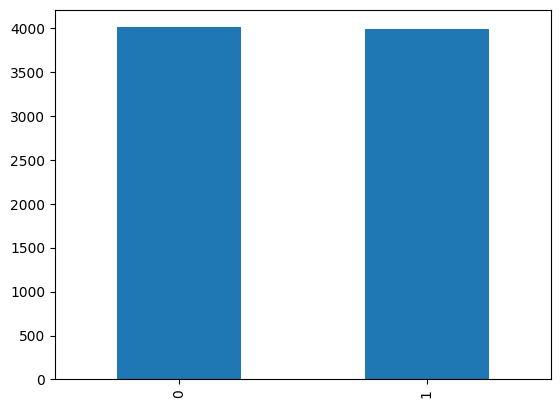

In [ ]:
#Visualizing the count using the bar graph
pd.value_counts(df['Fraud Flag or Label']).plot.bar()

This code drops the 'Transaction Date and Time' and 'IP Address' columns from the DataFrame df and selects only the columns with numeric data types to create the feature matrix X and the label vector 'y'.It then splits the feature matrix and label vector into training and testing sets using an 80:20 ratio and a random seed of 42.Finally, it converts the training and testing data from NumPy arrays to PyTorch tensors of type float32.

In [ ]:
# Drop any non-numeric or non-essential columns
X = df.drop(['Transaction Date and Time', 'IP Address'], axis=1).select_dtypes(include=['number']).values  # Features
y = df['Fraud Flag or Label'].values  # Labels

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


##  3.Neural Network Model Definition

The provided code defines a neural network architecture for credit card fraud detection using PyTorch. The `FraudDetectionNN` class is created with three fully connected layers, where the first two layers use the ReLU (Rectified Linear Unit) activation function to introduce non-linearity, and the final output layer uses the sigmoid activation function for binary classification. The network is initialized with specific input as 4, hidden as 64, and output layer size as 1.

In [ ]:
# Define the neural network architecture with activation functions
class FraudDetectionNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FraudDetectionNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # Input layer
        self.fc2 = nn.Linear(hidden_size, hidden_size)  # Hidden layer
        self.fc3 = nn.Linear(hidden_size, output_size)  # Output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))  # ReLU activation function for the first hidden layer
        x = F.relu(self.fc2(x))  # ReLU activation function for the second hidden layer
        x = F.sigmoid(self.fc3(x))  # Sigmoid activation function for the output layer
        return x

# Initialize the neural network with the determined input, hidden, and output sizes
input_size = 4  # Replace with the actual number of input features in the credit card fraud dataset
hidden_size = 64  # Choose an appropriate number of neurons for the hidden layer
output_size = 1  # For binary classification (fraudulent vs. non-fraudulent)
model = FraudDetectionNN(input_size, hidden_size, output_size)

This code involves the definition of a loss function and an optimizer, both of which are essential for training a neural network effectively. The line `loss_function` defines the loss function for the neural network. In this case, it is `BCEWithLogitsLoss`, which stands for Binary Cross-Entropy with Logits Loss. This particular loss function is commonly used for binary classification tasks, such as the fraud detection problem at hand. It combines a sigmoid activation function and the binary cross-entropy loss, making it suitable for scenarios where the model's final layer does not contain a sigmoid activation function. By utilizing this loss function, the model is trained to produce output values that can be interpreted as probabilities and compared with the actual binary labels, enabling effective training for binary classification tasks.


The line `optimizer` defines the optimizer for the neural network. Here, the Adam optimizer is employed with a learning rate of 0.001. The Adam optimizer is an adaptive learning rate optimization algorithm that is well-suited for training deep neural networks. It maintains adaptive learning rates for each parameter and separately adapts the rates based on the average of the first and second moments of the gradients. This adaptive nature allows Adam to efficiently handle sparse gradients, noisy problems, and large-scale applications. The choice of a learning rate of 0.001 is a common starting point and can be adjusted based on the specific characteristics of the dataset and the network architecture.

In [ ]:
# Define the loss function
loss_function = nn.BCEWithLogitsLoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

The line of code `print(X_train.shape)` is used to display the shape of the training data, allowing for a quick inspection of the dimensions of the input data to ensure it aligns with the expected format, which is a common practice in machine learning. Subsequently, the line `y_pred = model(X_train)` is employed to make predictions using the trained neural network model, where the input data `X_train` is passed to the model, and the resulting `y_pred` contains the model's predictions for the input data. This step is crucial for evaluating the model's performance and comparing its predictions to the actual target values, with the `y_pred` array having a shape corresponding to the number of samples and the model's output dimensions, determined by the architecture of the neural network and the specific problem being addressed.

In [ ]:
print(X_train.shape)
y_pred = model(X_train)

torch.Size([6400, 4])


## 4. Model Training

The provided code sets the number of training epochs to 100 and then initiates a training loop that iterates over the specified number of epochs. Within each epoch, the model is set to training mode using `model.train()`, the optimizer's gradients are cleared with `optimizer.zero_grad()`, and the forward pass is performed to obtain the predictions for the training data. Subsequently, the loss is computed using the specified loss function, and the backward pass is executed to calculate the gradients. The optimizer is then used to update the model's parameters based on the computed gradients. Additionally, the code includes a conditional statement to print the training loss every 10 epochs, providing visibility into the model's training progress and the convergence of the loss function over the course of the training process. This approach allows for monitoring the model's performance and loss reduction throughout the training iterations, aiding in the assessment of the training dynamics and the effectiveness of the optimization process.

In [ ]:
# Number of epochs
epochs = 100

# Training loop
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()  # Clear the gradients
    # Forward pass
    y_pred = model(X_train)
    # Compute loss
    loss = loss_function(y_pred.squeeze(), y_train)
    # Backward pass
    loss.backward()
    optimizer.step()

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

Epoch 1/100, Loss: 0.8149045705795288
Epoch 11/100, Loss: 0.6931473016738892
Epoch 21/100, Loss: 0.6931473016738892
Epoch 31/100, Loss: 0.6931473016738892
Epoch 41/100, Loss: 0.6931473016738892
Epoch 51/100, Loss: 0.6931473016738892
Epoch 61/100, Loss: 0.6931473016738892
Epoch 71/100, Loss: 0.6931473016738892
Epoch 81/100, Loss: 0.6931473016738892
Epoch 91/100, Loss: 0.6931473016738892


## 5. Model Evaluation

Here at frist, the model is set to evaluation mode using `model.eval()`. Then, with the `torch.no_grad()` context manager, predictions are made on the test data `X_test` using the trained model `model`. The output of the model is then transformed into class predictions by rounding the values to the nearest integer using `torch.round(torch.sigmoid(y_pred.squeeze()))`. After this, the code calculates and prints a classification report using the `classification_report` function from the `sklearn.metrics` module, which provides a comprehensive summary of the model's performance, including metrics such as precision, recall, and F1-score for each class. Additionally, the code computes and prints the confusion matrix for the model's predictions on the test data using the `confusion_matrix` function from the `sklearn.metrics` module, which allows for a detailed analysis of the model's performance in terms of true positive, false positive, true negative, and false negative predictions. These metrics and visualizations are essential for understanding how well the model is performing and identifying any potential issues such as imbalanced class predictions or specific types of misclassifications.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_class = torch.round(torch.sigmoid(y_pred.squeeze()))

# Calculate evaluation metrics
print(classification_report(y_test, y_pred_class))
cm = confusion_matrix(y_test, y_pred_class)
print(cm)

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.66       793
         1.0       0.00      0.00      0.00       807

    accuracy                           0.50      1600
   macro avg       0.25      0.50      0.33      1600
weighted avg       0.25      0.50      0.33      1600

[[793   0]
 [807   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The provided code segment is responsible for visualizing the confusion matrix, a key tool for evaluating the performance of a machine learning model. The `sns.heatmap(cm, annot=True, fmt='d')` line utilizes the `seaborn` library to create a heatmap of the confusion matrix. The `annot=True` parameter ensures that the cell values are annotated within the heatmap, and `fmt='d'` specifies that the annotations should be in integer format. The `plt.xlabel('Predicted')` and `plt.ylabel('True')` lines set the labels for the x-axis and y-axis of the plot, indicating the predicted and true class labels, respectively. Finally, `plt.show()` is used to display the generated heatmap. This visualization provides a clear and intuitive representation of the model's performance, allowing for easy identification of misclassifications and an overall assessment of the model's predictive accuracy.

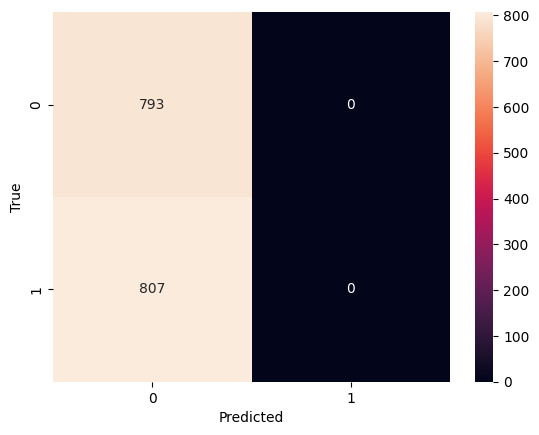

In [ ]:
# Confusion matrix visualization
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Overall Understanding

This project consists of several essential steps for building and training a neural network for credit card fraud detection. It begins by importing the necessary libraries, including `pandas` for data manipulation, `torch.nn` and `torch.nn.functional` for defining and training neural networks, and `matplotlib.pyplot` and `seaborn` for data visualization. The credit card transaction dataset is then loaded using `pd.read_csv`, and the first few rows of the dataset are displayed to provide an initial overview of the data.

Subsequently, the code performs data preprocessing, which involves dropping non-numeric or non-essential columns from the dataset and splitting the data into training and testing sets. The numeric features are then converted to PyTorch tensors, which are essential for training a PyTorch neural network.

The next steps include defining a neural network architecture for fraud detection, training the model using the defined architecture, and evaluating the model's performance. The model is trained using a specified number of epochs, and the loss is printed at regular intervals to monitor the training progress. After training, the model is evaluated using the testing set, and a classification report and confusion matrix are generated to assess the model's performance. The confusion matrix is visualized using `seaborn` to provide a clear representation of the model's predictive capabilities.